Importing and Configuring of essential packages

The first process before a dataset can be analysed, manipulated or even merged amongst other functions is the importation and configuration of essential packages.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import sklearn
sklearn.set_config(transform_output="pandas")

In [3]:
!pip install category_encoders -q

In [4]:
#!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

import torch
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel, f_classif, chi2
from sklearn.model_selection import RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

In [5]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.2 MB/s eta 0:00:00


In [6]:
import shap
shap.initjs()

In [8]:
!pip install --upgrade shap -q

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lets Load the Dataset

In [10]:
Adverts = pd.read_csv("/content/drive/MyDrive/Machine Learning Coursework/adverts.csv")

 Now lets see what type of data each ofthe columns and rows contain.

In [11]:
Adverts.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [12]:
Adverts.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


From the output, we can see the content of FIRST 5 rows and colums of categorical and numerical features.
Now that we have explored the rows and columns of the dataset, lets check that datatypes of all the features.

In [13]:
Adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


#1 Data Pre Processing

Checking for Missing Values in the dataset

In [14]:
Adverts.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [15]:
Adverts.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel


From the output we can see that our dataset contains null values but in the long run can affect our analysis on prediction.

Dealing with Mileage

The mileage of the vehicle has 127 missing values and cannot be estimated from available values therefore i dropped the missing values.

In [16]:
# Dropping the missing values in mileage
Adverts = Adverts.dropna(subset=['mileage'])

Dealing with Missing values in Year of registration

Now that we have seen a few attributes of the dataset, lets look at some of the functions we can call

In [17]:
Adverts.describe()

,public_reference,mileage,year_of_registration,price
count,4.018780e+05,401878.000000,368586.000000,4.018780e+05
mean,2.020071e+14,37743.595656,2015.006509,1.734081e+04
std,1.688173e+10,34831.724018,7.962575,4.644190e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


The describe gives us a statistical information about our numerical columns. The features of non numerical values can also be check with describe however, parameters have to be indicated

In [18]:
# Checking for unique values and their counts in 'year_of_registration' feature without truncation
unique_values = Adverts['year_of_registration'].value_counts(dropna=False)
with pd.option_context('display.max_rows', None):
    print(unique_values)

year_of_registration
2017.0    68775
2016.0    43481
2019.0    39234
2018.0    38294
NaN       33292
2015.0    29012
2020.0    28651
2014.0    23662
2013.0    19109
2012.0    15308
2011.0    12613
2010.0    10825
2009.0     9008
2008.0     7289
2007.0     6690
2006.0     4726
2005.0     3384
2004.0     2509
2003.0     1730
2002.0     1083
2001.0      675
2000.0      447
1999.0      288
1998.0      249
1997.0      210
1996.0      147
1995.0      108
1994.0       97
1991.0       86
1992.0       79
1989.0       78
1990.0       75
1988.0       68
1993.0       68
1987.0       41
1986.0       37
1973.0       29
1985.0       29
1980.0       24
1972.0       24
1970.0       24
1971.0       22
1979.0       22
1982.0       21
1969.0       19
1984.0       19
1968.0       17
1983.0       16
1978.0       15
1964.0       14
1965.0       14
1981.0       12
1976.0       12
1977.0       12
1967.0        9
1962.0        9
1974.0        9
1966.0        8
1961.0        7
1963.0        7
1975.0        6
195

From the above, we can see untrunctured year of registration faetures. based on the link in https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom, this are error or invalid or outliers and will be dropped


In [19]:
# Rectifying the specified years
year_mapping = {
    1007: 2007,
    1009: 2009,
    1008: 2008,
    1006: 2006,
    1017: 2017,
    1018: 2018,
    1010: 2010,
    1016: 2016,
    1015: 2015
}

Adverts['year_of_registration'].replace(year_mapping, inplace=True)

# Dropping rows with the specified years
years_to_drop = [999, 1515, 1063]
Adverts = Adverts[~Adverts['year_of_registration'].isin(years_to_drop)]

# Resetting the index after dropping rows
Adverts.reset_index(drop=True, inplace=True)

Lets check if they have been successfully dropped

In [20]:
unique_values = Adverts['year_of_registration'].value_counts(dropna=False)
with pd.option_context('display.max_rows', None):
    print(unique_values)

year_of_registration
2017.0    68776
2016.0    43482
2019.0    39234
2018.0    38295
NaN       33292
2015.0    29013
2020.0    28651
2014.0    23662
2013.0    19109
2012.0    15308
2011.0    12613
2010.0    10826
2009.0     9010
2008.0     7290
2007.0     6693
2006.0     4727
2005.0     3384
2004.0     2509
2003.0     1730
2002.0     1083
2001.0      675
2000.0      447
1999.0      288
1998.0      249
1997.0      210
1996.0      147
1995.0      108
1994.0       97
1991.0       86
1992.0       79
1989.0       78
1990.0       75
1993.0       68
1988.0       68
1987.0       41
1986.0       37
1973.0       29
1985.0       29
1972.0       24
1980.0       24
1970.0       24
1971.0       22
1979.0       22
1982.0       21
1984.0       19
1969.0       19
1968.0       17
1983.0       16
1978.0       15
1965.0       14
1964.0       14
1976.0       12
1981.0       12
1977.0       12
1967.0        9
1962.0        9
1974.0        9
1966.0        8
1961.0        7
1963.0        7
1975.0        6
195

In [21]:
Adverts[Adverts.isnull().any(axis=1)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
25,202008042070611,49585.0,B,NaN,Ferrari,308,USED,1984.0,54475,Convertible,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401770,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401771,202010134965616,25800.0,65,NaN,Mercedes-Benz,AMG GT,USED,2016.0,65900,Coupe,False,Petrol
401773,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol
401799,202010195183847,92261.0,60,NaN,Vauxhall,Antara,USED,2010.0,3495,SUV,False,Diesel


From the output we can see that most NaN values are associated with vehicles with condition 'NEW'
Therefore it cannot be dropped as we will be missing infomation about new vehicles. Hence we will be filling with the mode.

In [22]:
Adverts.loc[Adverts['vehicle_condition'] == 'NEW', 'year_of_registration'].fillna(Adverts[Adverts['vehicle_condition'] == 'new']['year_of_registration'].mode(), inplace=True)

Now lets fill the missing Values for the Used vehicles

In [23]:
Adverts['year_of_registration'].fillna(Adverts.loc[Adverts['vehicle_condition'] == 'USED', 'year_of_registration'].mode()[0], inplace=True)

Dealing with Standard Colour, body type, and fuel type

In [24]:
Adverts['standard_colour'].nunique()

22

we cannot determine the colour of a vehicle from other vehicles in the dataset therefore all missing values in this colums will be dropped.

In [25]:
# Dropping the missing values in the 'standard_colour' column
Adverts = Adverts.dropna(subset=['standard_colour', 'body_type','fuel_type'])

In [26]:
Adverts.isnull().sum()

public_reference             0
mileage                      0
reg_code                 30508
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

From the above we can see that we have handled most of our missing values except for reg code that will be handled later

Checking for Outliers

In [27]:
Adverts.describe()

,public_reference,mileage,year_of_registration,price
count,3.952580e+05,395258.000000,395258.000000,3.952580e+05
mean,2.020071e+14,37803.249331,2015.229273,1.713527e+04
std,1.667166e+10,34735.897659,4.143152,4.562221e+04
min,2.013072e+14,0.000000,1909.000000,1.200000e+02
25%,2.020090e+14,10690.000000,2014.000000,7.495000e+03
50%,2.020093e+14,28765.000000,2017.000000,1.250000e+04
75%,2.020102e+14,56832.750000,2018.000000,1.999500e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


Analysis of Predictive Power

,public_reference,mileage,year_of_registration,price
public_reference,1.000000,0.032664,0.029662,-0.049368
mileage,0.032664,1.000000,-0.690216,-0.159896
year_of_registration,0.029662,-0.690216,1.000000,0.116179
price,-0.049368,-0.159896,0.116179,1.000000


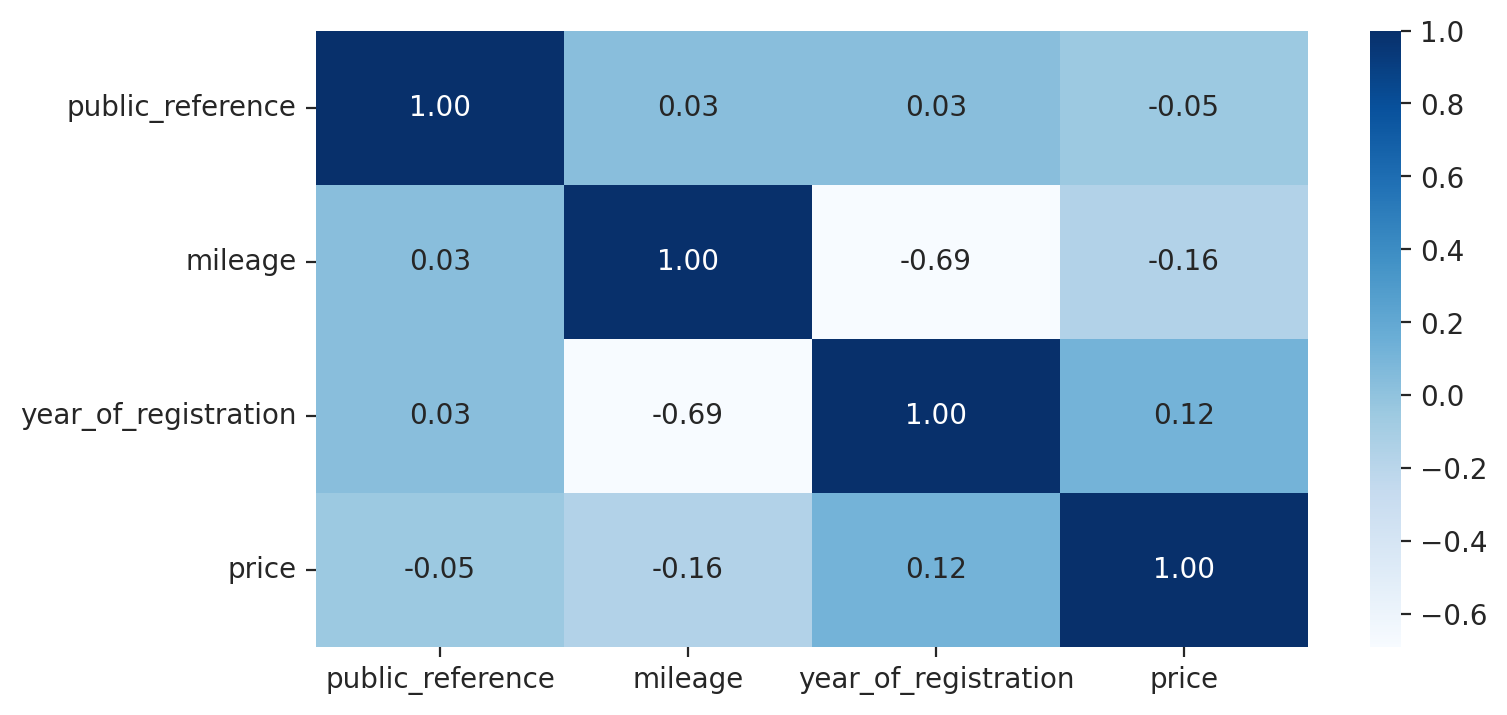

In [28]:
col_num = Adverts.select_dtypes(include=['float64', 'int64'])
corr_matrix = col_num.corr()
plt.figure(figsize=(8, 4))  # Adjust size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
col_num = Adverts.select_dtypes(include=['float64', 'int64'])
corr_matrix

lets draw a plotbox to better visualize the numerical data

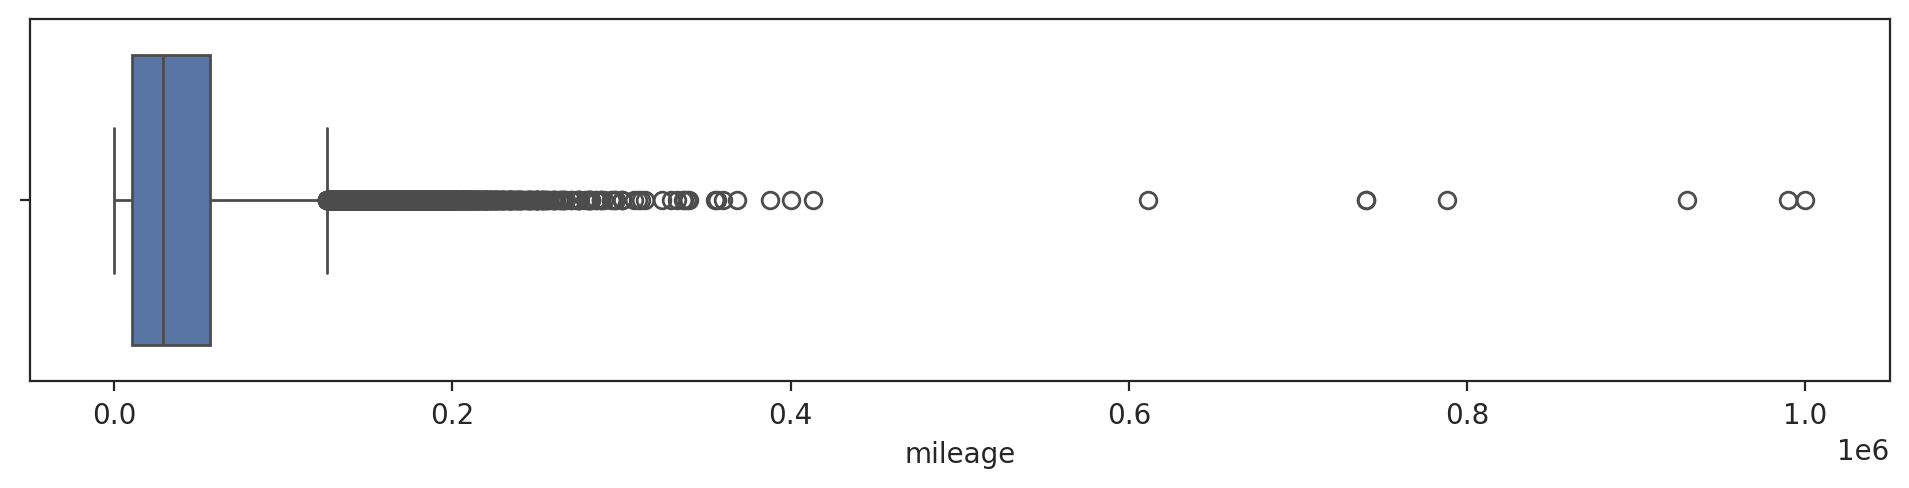

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
sns.boxplot(x=Adverts['mileage']);


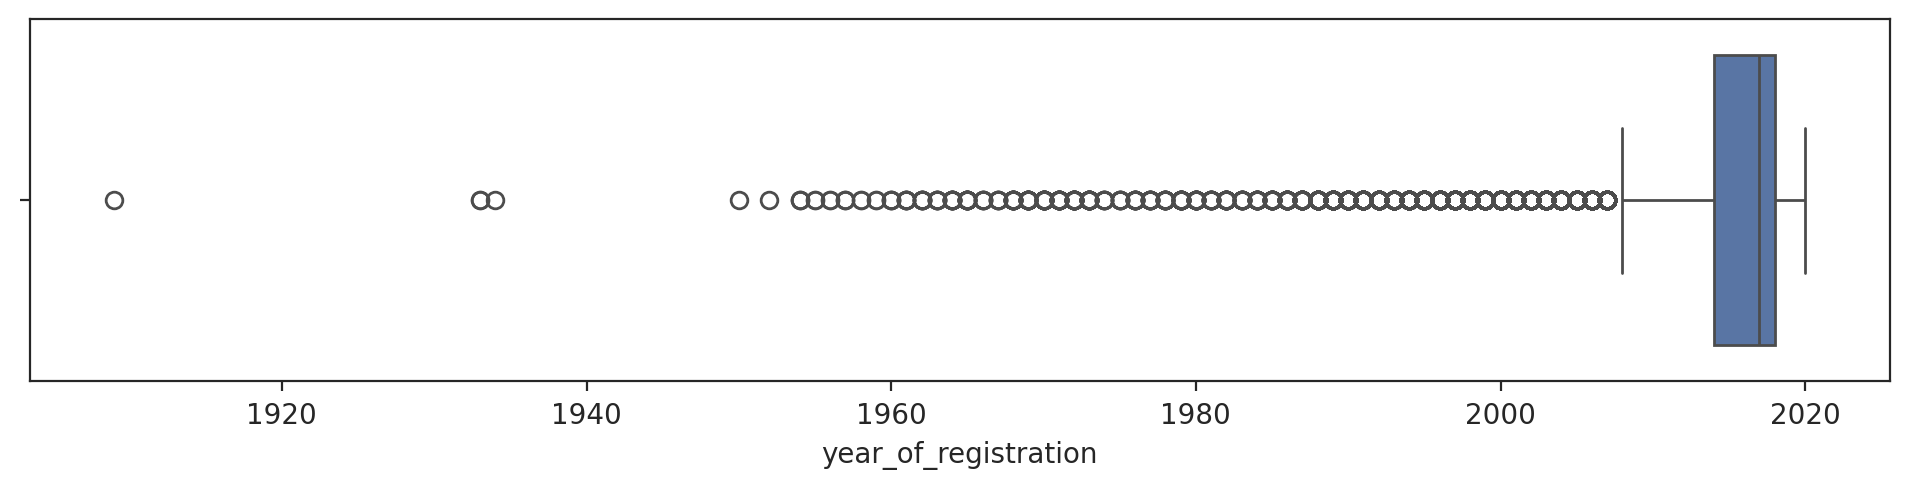

In [30]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,2)
sns.boxplot(x=Adverts['year_of_registration']);

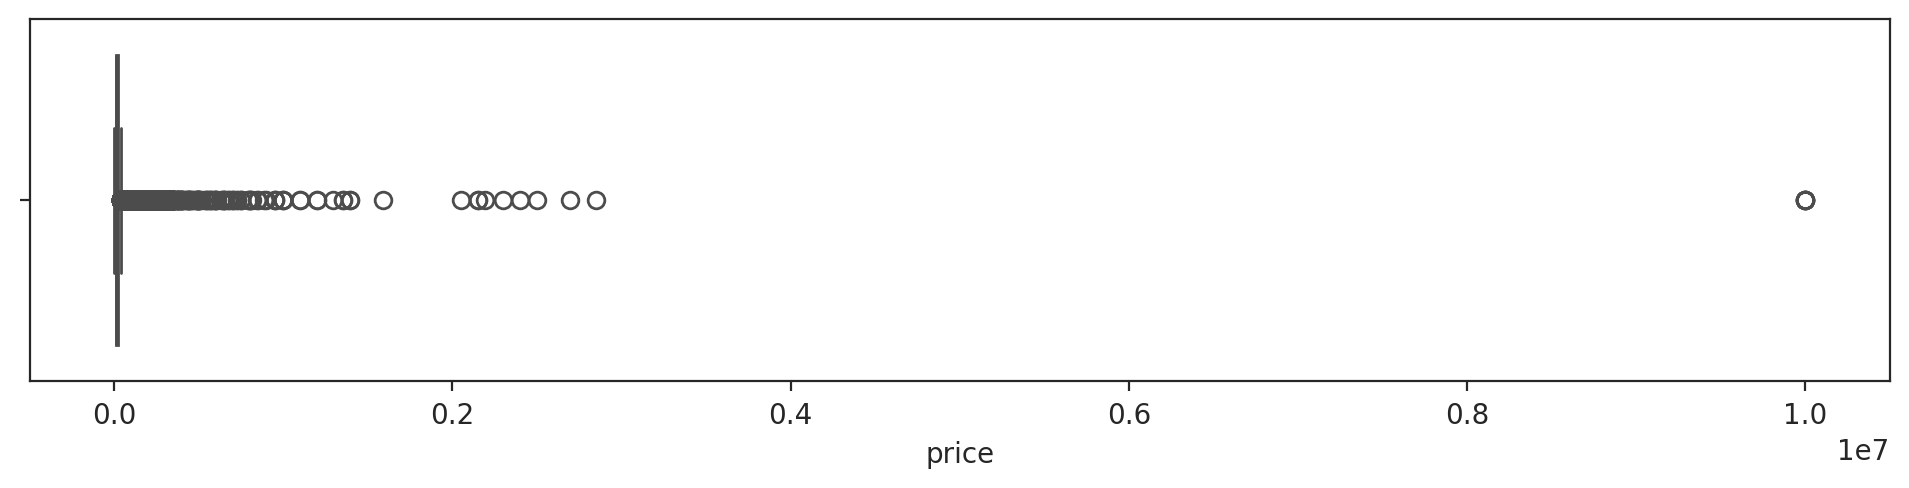

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,3)
sns.boxplot(x=Adverts['price']);

In [32]:
from sklearn.preprocessing import TargetEncoder
import category_encoders as ce

#2  Feature Engineering

In [33]:
Adverts = Adverts.drop(['public_reference', 'crossover_car_and_van'], axis = 1)

In [34]:
Adverts.head(1)

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,0.0,NaN,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,Petrol Plug-in Hybrid


In [35]:
Adverts.shape

(395258, 10)

In [36]:
Adverts[(Adverts['reg_code'] == '18')]

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
20,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,Petrol
31,7989.0,18,Blue,Kia,Sorento,USED,2018.0,30000,SUV,Diesel
42,4189.0,18,Black,Peugeot,108,USED,2018.0,8495,Hatchback,Petrol
46,19000.0,18,Black,Mercedes-Benz,E Class,USED,2018.0,32980,Saloon,Petrol Plug-in Hybrid
54,30000.0,18,Red,Vauxhall,Insignia,USED,2017.0,11990,Hatchback,Petrol
...,...,...,...,...,...,...,...,...,...,...
401807,20451.0,18,Grey,Suzuki,SX4 S-Cross,USED,2018.0,11690,SUV,Petrol
401809,18374.0,18,Red,Vauxhall,Corsa,USED,2018.0,8000,Hatchback,Petrol
401836,23256.0,18,Black,Volvo,V40,USED,2018.0,13795,Hatchback,Diesel
401840,22153.0,18,Blue,Mercedes-Benz,C Class,USED,2018.0,20800,Saloon,Diesel


From the outputs, it can be observed that there is a  relationship between the reg code and the yaer of registration'. this is because where reg code is 18, year of registration is also 2018. Therefore lets drop the reg code as it is giving similar information


In [37]:
# Dropping the'reg_code' columns
Adverts = Adverts.drop(['reg_code'], axis=1)

Lets check if reg_code has been successfully dropped

In [38]:
Adverts.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel


In [39]:
Adverts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395258 entries, 0 to 401872
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               395258 non-null  float64
 1   standard_colour       395258 non-null  object 
 2   standard_make         395258 non-null  object 
 3   standard_model        395258 non-null  object 
 4   vehicle_condition     395258 non-null  object 
 5   year_of_registration  395258 non-null  float64
 6   price                 395258 non-null  int64  
 7   body_type             395258 non-null  object 
 8   fuel_type             395258 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 30.2+ MB


In [40]:
current_year = datetime.datetime.now().year
Adverts['age_of_car'] = current_year - Adverts['year_of_registration']

Let check to confirm that the age column has been created


In [41]:
Adverts.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,age_of_car
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,Petrol Plug-in Hybrid,7.0
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel,13.0
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol,7.0
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel,8.0
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel,9.0


In [42]:
# Dropping the'year_of_registration' columns
Adverts = Adverts.drop(['year_of_registration'], axis=1)

In [43]:
Adverts.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,age_of_car
0,0.0,Grey,Volvo,XC90,NEW,73970,SUV,Petrol Plug-in Hybrid,7.0
1,108230.0,Blue,Jaguar,XF,USED,7000,Saloon,Diesel,13.0
2,7800.0,Grey,SKODA,Yeti,USED,14000,SUV,Petrol,7.0
3,45000.0,Brown,Vauxhall,Mokka,USED,7995,Hatchback,Diesel,8.0
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,26995,SUV,Diesel,9.0


Data Sampling

## Categorical Encoding ans Data Rescaling



In [44]:
cols = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']
target = 'price'

In [45]:
from sklearn.metrics import mean_squared_log_error, r2_score



In [46]:
te = ce.TargetEncoder(cols=cols)

In [47]:
data_encoded = te.fit_transform(Adverts[cols], Adverts[target])

In [48]:
adv2 = Adverts.drop(columns=['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type'])

In [49]:
encoded_car = pd.concat([adv2, data_encoded], axis=1)

In [50]:
encoded_car.head()

,mileage,price,age_of_car,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
0,0.0,73970,7.0,20006.033784,24870.898665,39750.947498,32680.308969,22350.423597,35917.854375
1,108230.0,7000,13.0,16801.781357,26050.494622,15831.563874,15857.757952,19166.973404,16436.273618
2,7800.0,14000,7.0,20006.033784,13688.133284,10570.696233,15857.757952,22350.423597,16422.815220
3,45000.0,7995,8.0,13282.766932,8117.382530,7834.015945,15857.757952,10417.790845,16436.273618
4,64000.0,26995,9.0,20006.033784,35267.368012,42076.199787,15857.757952,22350.423597,16436.273618


In [51]:
y = encoded_car['price']
X = encoded_car.drop('price', axis=1)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Reuseable Pre-Processing and Model Fitting Piplines

In [53]:
def create_pp_ppln(X, linear_model=False):
    """creates a default preprocessing pipeline for numeric and categorical data
    using simple imputers, scalers, and encoders. It relies on latest versions
    of sklearn so as to produce pandas outputs.

    X: the dataset with the features (needed for feature names)

    returns the Pipeline object
    """

    numeric_features = X.select_dtypes(exclude='object').columns.tolist()
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="mean"))
        ]
    )
    # if we are dealing with a linear model I'll add scaling/polynomial features
    if linear_model:
        numeric_transformer.steps.extend([
            ("scaler", StandardScaler()),
            ('poly', PolynomialFeatures(include_bias=False))
        ])

    categorical_features = X.select_dtypes(include='object').columns.tolist()
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    return preprocessor

def create_regr_ppln(est, X, linear_model=False):
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X, linear_model)),
            ("feat_select", SelectKBest(k=8)),
            ("regr", est)
        ]
    )

    return regr_pipe

## Data Sampling

In [54]:
sample_fraction = 0.15
X_train_samp = X_train.sample(frac=sample_fraction, random_state=42)
y_train_samp = y_train.loc[X_train_samp.index]

#4 Model Building

Lets build our models

In [57]:
gbr  = create_regr_ppln(GradientBoostingRegressor(max_depth=3), X_train_samp)
rfr  = create_regr_ppln(RandomForestRegressor(max_depth=8), X_train_samp)
lr   = create_regr_ppln(LinearRegression(), X_train_samp, linear_model=True)
my_models = [ gbr, rfr, lr ]

In [89]:
gbr

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage', 'age_of_car',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('feat_select', SelectKBest(k=8)),
                ('regr', GradientBoostingRegressor())])

In [90]:
rfr

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage', 'age_of_car',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('feat_select', SelectKBest(k=8)),
                ('regr', RandomForestRegressor(max_depth=8))])

In [91]:
lr

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage', 'age_of_car',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('feat_select', SelectKBest(k=8)),
                ('regr', LinearRegression())])

In [58]:
model_results_list = []
for my_model in my_models:
    eval_results = cross_validate(
        my_model, X_train_samp, y_train_samp, cv=5,
        scoring='neg_mean_absolute_error',
        return_train_score=True
    )
    model_results_list.append(
        (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
         -eval_results['train_score'].mean(), eval_results['train_score'].std())
    )

In [59]:
model_results = pd.DataFrame(
    model_results_list,
    columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std'],
    index=['gbr', 'rfr', 'lr']
)

In [60]:
model_results

,test_mae_mean,test_mae_std,train_mae_mean,train_mae_std
gbr,3342.247105,77.789085,3131.699821,22.757872
rfr,3482.164320,146.269122,3210.789972,61.766962
lr,6332.326365,45.345430,6284.176104,53.678260


In [61]:
for est in my_models:
    est.fit(X_train_samp, y_train_samp)

In [62]:
ensemble = VotingRegressor(
    [
        ("gb", gbr),
        ("rf", rfr),
        ('lr', lr)
    ]
)
ensemble.fit(X_train_samp, y_train_samp)

VotingRegressor(estimators=[('gb',
                             Pipeline(steps=[('pp',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['mileage',
                                                                                'age_of_car',
                                                                                'standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_f...
                                                                               ['mileage',
                                                                                'age_of_car',
                                                                                'standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               [])],
                                                                verbose_feature_names_out=False)),
                                             ('feat_select', SelectKBest(k=8)),
                                             ('regr', LinearRegression())]))])

In [63]:
eval_results = cross_validate(
    ensemble, X_train_samp, y_train_samp, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
ensemble_result = (
    -eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std()
)

In [64]:
model_results.loc['ensemble'] = ensemble_result

In [65]:
model_results

,test_mae_mean,test_mae_std,train_mae_mean,train_mae_std
gbr,3342.247105,77.789085,3131.699821,22.757872
rfr,3482.164320,146.269122,3210.789972,61.766962
lr,6332.326365,45.345430,6284.176104,53.678260
ensemble,3830.617381,61.361899,3690.243103,32.894551


In [66]:
# quickly adapted from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html
xt = X.head(20)
yt = y.head(20)
pred_gbr = gbr.predict(xt)
pred_rfr = rfr.predict(xt)
pred_lr = lr.predict(xt)
pred_ens = ensemble.predict(xt)

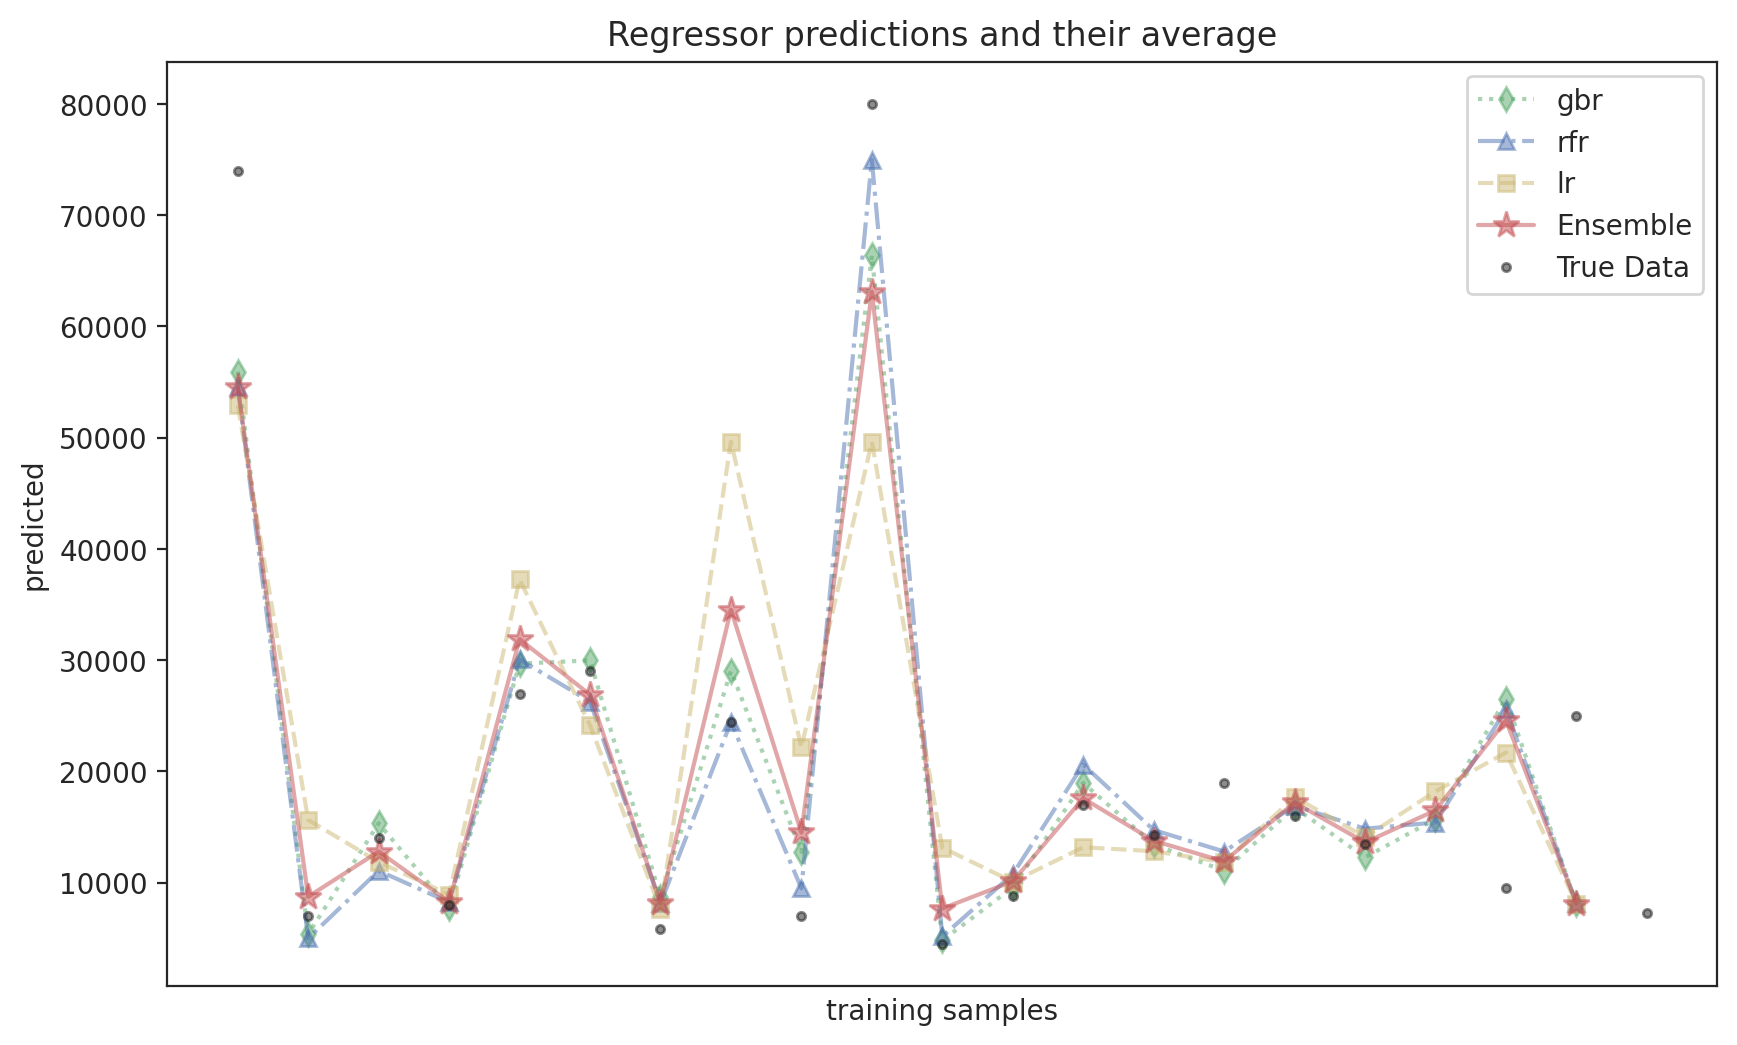

In [67]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gbr, "gd:", alpha=0.5, label="gbr")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="rfr")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average");

In [69]:
for name, est in zip(['gbr', 'rfr', 'lr'], my_models):
    # Predict on test data
    y_pred_test = est.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r_squared_test = r2_score(y_test, y_pred_test)

    # Predict on train data
    y_pred_train = est.predict(X_train_samp)
    mse_train = mean_squared_error(y_train_samp, y_pred_train)
    r_squared_train = r2_score(y_train_samp, y_pred_train)

    print(f"{name} Model Metrics:")
    print("Test Data:")
    print(f"  Mean Squared Error: {mse_test}")
    print(f"  R-squared: {r_squared_test}")
    print("Train Data:")
    print(f"  Mean Squared Error: {mse_train}")
    print(f"  R-squared: {r_squared_train}")


gbr Model Metrics:
Test Data:
  Mean Squared Error: 875395311.7503908
  R-squared: 0.7130053651843331
Train Data:
  Mean Squared Error: 45539902.68439105
  R-squared: 0.9905496594813782
rfr Model Metrics:
Test Data:
  Mean Squared Error: 1065849186.4332922
  R-squared: 0.6505658713006446
Train Data:
  Mean Squared Error: 142073030.39265162
  R-squared: 0.9705173169774196
lr Model Metrics:
Test Data:
  Mean Squared Error: 868838116.6771996
  R-squared: 0.7151551137381409
Train Data:
  Mean Squared Error: 233241232.04179138
  R-squared: 0.9515982921383515


# 5 Model Evaluation and Analysis

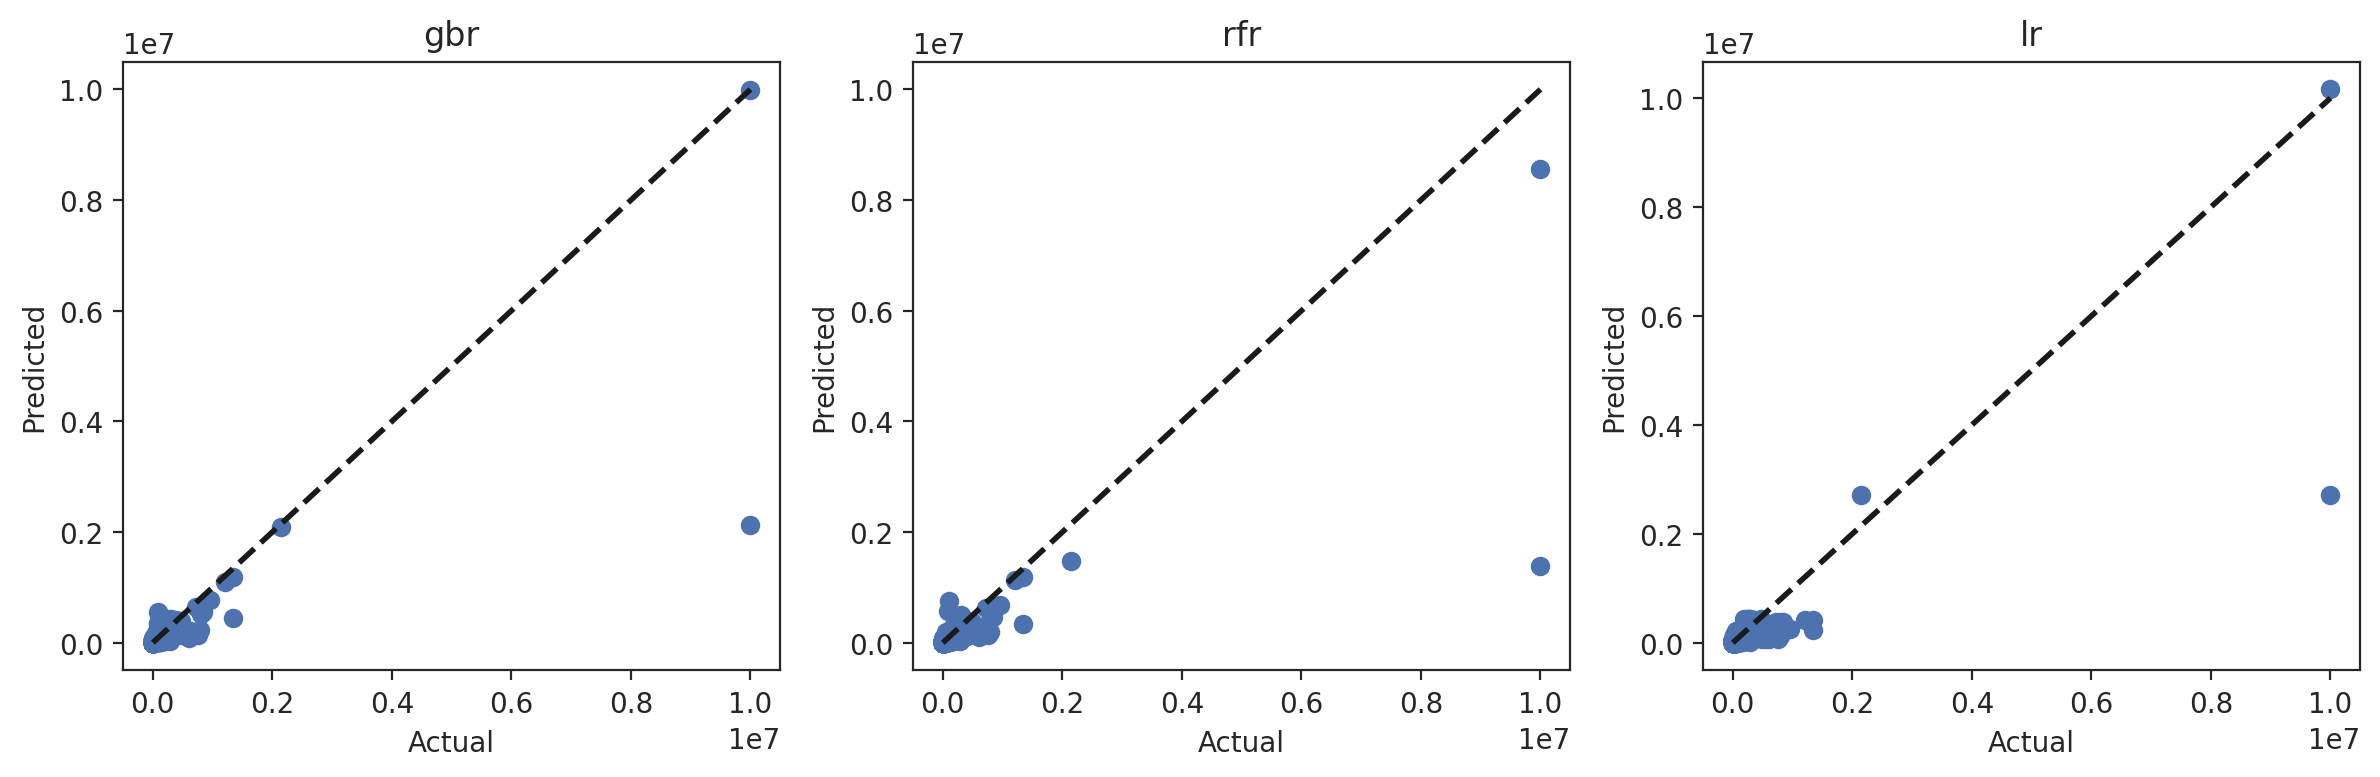

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
model_names = ['gbr', 'rfr', 'lr']

for i, model in enumerate(my_models):
    y_pred = model.predict(X_test)
    axs[i].scatter(y_test, y_pred)
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_title(model_names[i])
    axs[i].set_xlabel('Actual')
    axs[i].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

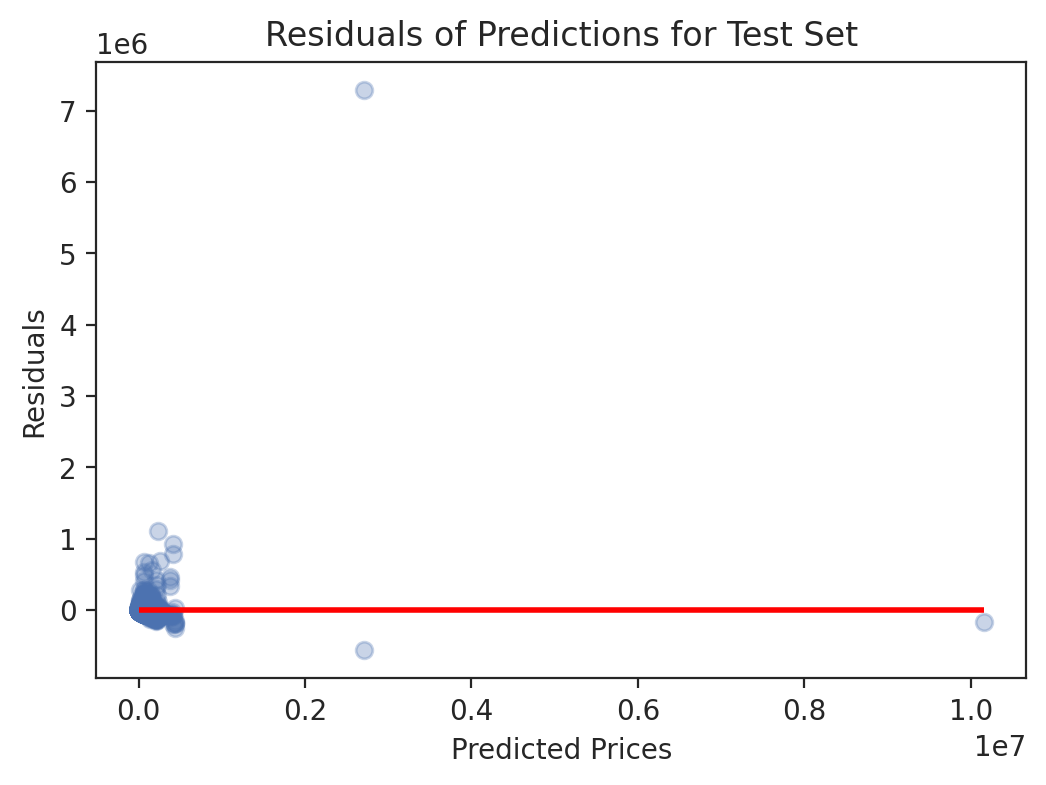

In [71]:
# Residuals Plot
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='red', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions for Test Set')
plt.show()

Ensemble Model Metrics:
Mean Squared Error: 903087020.2338227
R-squared: 0.7039267561754119


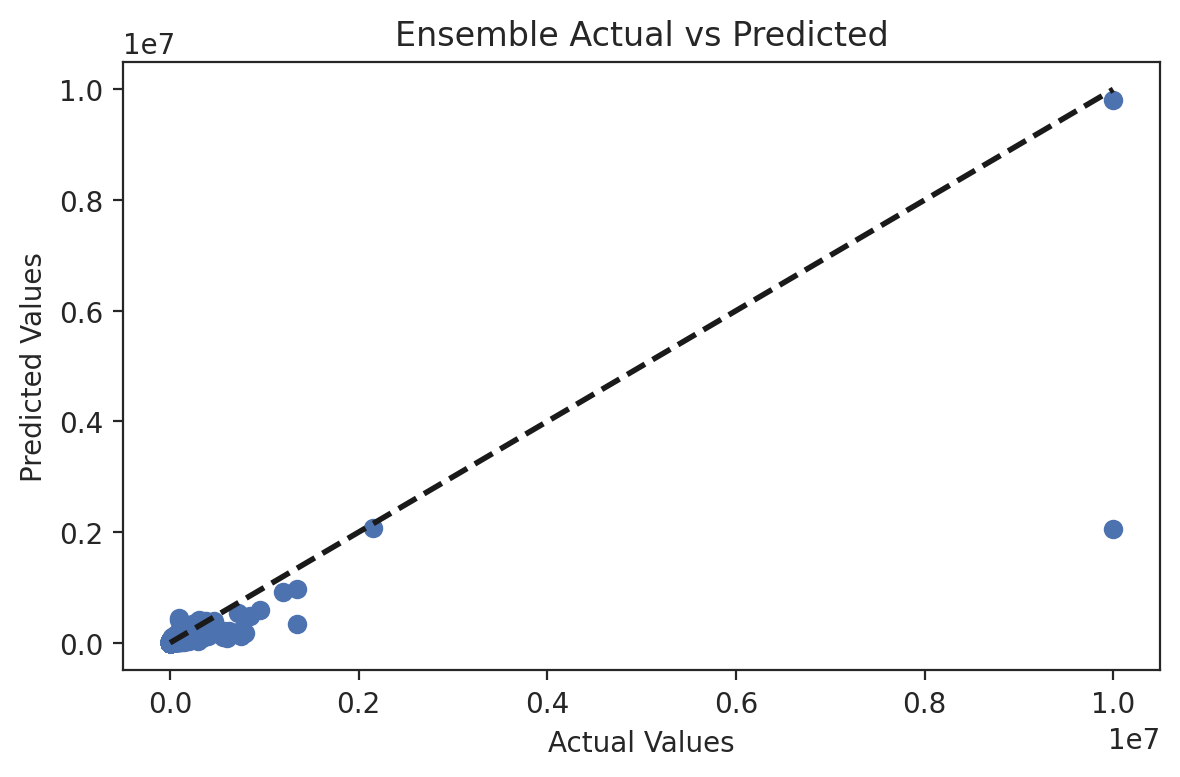

In [72]:
y_pred_ensemble = ensemble.predict(X_test)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r_squared_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model Metrics:")
print(f"Mean Squared Error: {mse_ensemble}")
print(f"R-squared: {r_squared_ensemble}")

# Actual vs Predicted plot for Ensemble
plt.scatter(y_test, y_pred_ensemble)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ensemble Actual vs Predicted")

plt.tight_layout()
plt.show()

In [73]:
mse_scores_train = []
r2_scores_train = []

for model in my_models:

    y_pred_train = model.predict(X_train_samp)

    mse_train = mean_squared_error(y_train_samp, y_pred_train)
    mse_scores_train.append(mse_train)

    r2_train = r2_score(y_train_samp, y_pred_train)
    r2_scores_train.append(r2_train)

mse_scores_test = []
r2_scores_test = []

for model in my_models:

    y_pred_test = model.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_scores_test.append(mse_test)

    r2_test = r2_score(y_test, y_pred_test)
    r2_scores_test.append(r2_test)

ensemble_predictions_train = np.mean([model.predict(X_train_samp) for model in my_models], axis=0)
ensemble_mse_train = mean_squared_error(y_train_samp, ensemble_predictions_train)
ensemble_r2_train = r2_score(y_train_samp, ensemble_predictions_train)

ensemble_predictions_test = np.mean([model.predict(X_test) for model in my_models], axis=0)
ensemble_mse_test = mean_squared_error(y_test, ensemble_predictions_test)
ensemble_r2_test = r2_score(y_test, ensemble_predictions_test)

model_names = ['gbr', 'rf', 'lr']

for i, model in enumerate(my_models):
    print(f"{model_names[i]}:")
    print(f"Train Data - MSE: {mse_scores_train[i]}, R2 score: {r2_scores_train[i]}")
    print(f"Test Data - MSE: {mse_scores_test[i]}, R2 score: {r2_scores_test[i]}")
    print()

print("Ensemble:")
print(f"Train Data - MSE: {ensemble_mse_train}, R2 score: {ensemble_r2_train}")
print(f"Test Data - MSE: {ensemble_mse_test}, R2 score: {ensemble_r2_test}")


gbr:
Train Data - MSE: 45539902.68439105, R2 score: 0.9905496594813782
Test Data - MSE: 875395311.7503908, R2 score: 0.7130053651843331

rf:
Train Data - MSE: 142073030.39265162, R2 score: 0.9705173169774196
Test Data - MSE: 1065849186.4332922, R2 score: 0.6505658713006446

lr:
Train Data - MSE: 233241232.04179138, R2 score: 0.9515982921383515
Test Data - MSE: 868838116.6771996, R2 score: 0.7151551137381409

Ensemble:
Train Data - MSE: 87070502.96277952, R2 score: 0.981931320586507
Test Data - MSE: 901209122.8353274, R2 score: 0.7045424168613537


In [74]:
gbr_params = {
    'regr__n_estimators': [50, 100, 200],
    'regr__learning_rate': [0.05, 0.1],
    'regr__max_depth': [3, 10],
}
gbr_rand =RandomizedSearchCV(gbr, gbr_params, n_iter=10, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)

gbr_rand.fit(X_train_samp, y_train_samp)
best_gbr_estimator = gbr_rand.best_estimator_

In [75]:
gbr_eval_results = cross_validate(best_gbr_estimator, X_train_samp, y_train_samp, cv=3,
                                  scoring='neg_mean_absolute_error', return_train_score=True)

print("Gradient Boosting Regressor:")
print("Test Mean MAE:", -gbr_eval_results['test_score'].mean())
print("Test Standard Deviation MAE:", gbr_eval_results['test_score'].std())
print("Train Mean MAE:", -gbr_eval_results['train_score'].mean())
print("Train Standard Deviation MAE:", gbr_eval_results['train_score'].std())

Gradient Boosting Regressor:
Test Mean MAE: 2657.5488505779813
Test Standard Deviation MAE: 488.4478541172825
Train Mean MAE: 1089.1062837789584
Train Standard Deviation MAE: 23.093231609530772


In [76]:
gbr_model = gbr.named_steps['regr']

In [77]:
coefs = pd.DataFrame({
  'feature': X.columns,
  'coefficient': np.round(gbr.named_steps['regr'].feature_importances_, 3)
})
coefs

,feature,coefficient
0,mileage,0.014
1,age_of_car,0.010
2,standard_colour,0.001
3,standard_make,0.007
4,standard_model,0.963
5,vehicle_condition,0.000
6,body_type,0.000
7,fuel_type,0.005


## 5.1 Global and Local Explanations with shap

In [78]:

explainer = shap.TreeExplainer(gbr.named_steps['regr'])
shap_values = explainer.shap_values(X_train_samp)

In [79]:
shap_values = explainer(X_test)

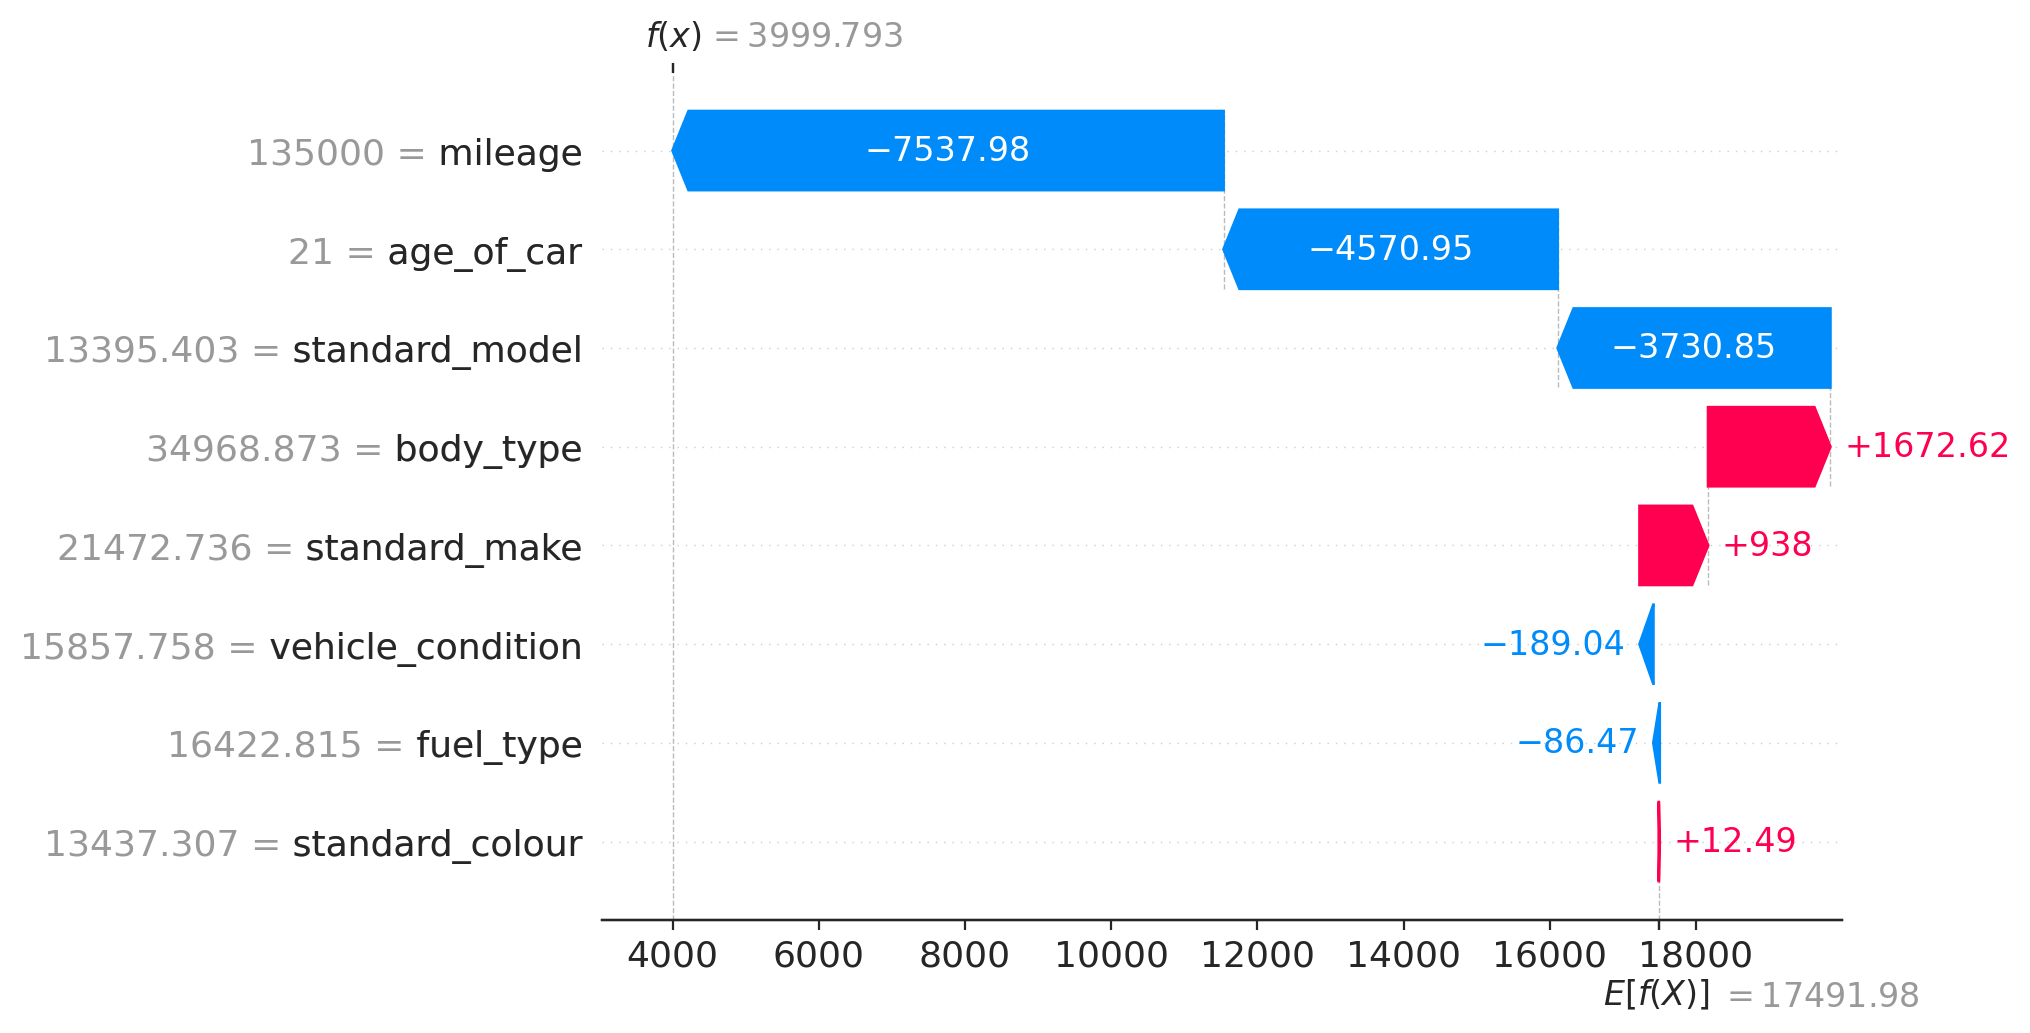

In [80]:
shap.plots.waterfall(shap_values[0])

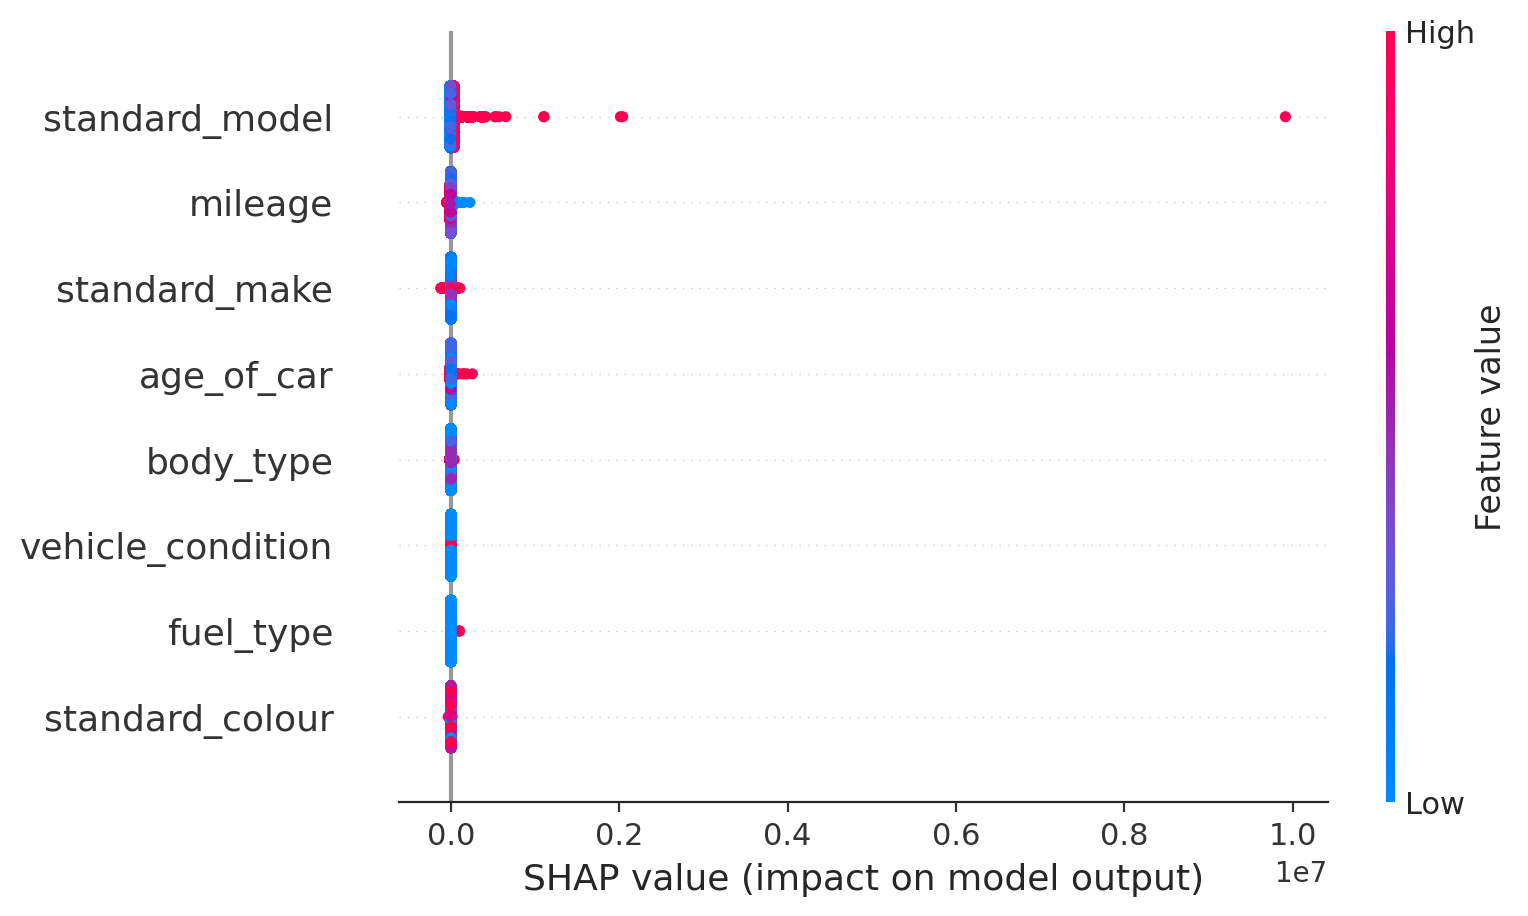

In [81]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)


## 5.2 Partial Dependency Plots

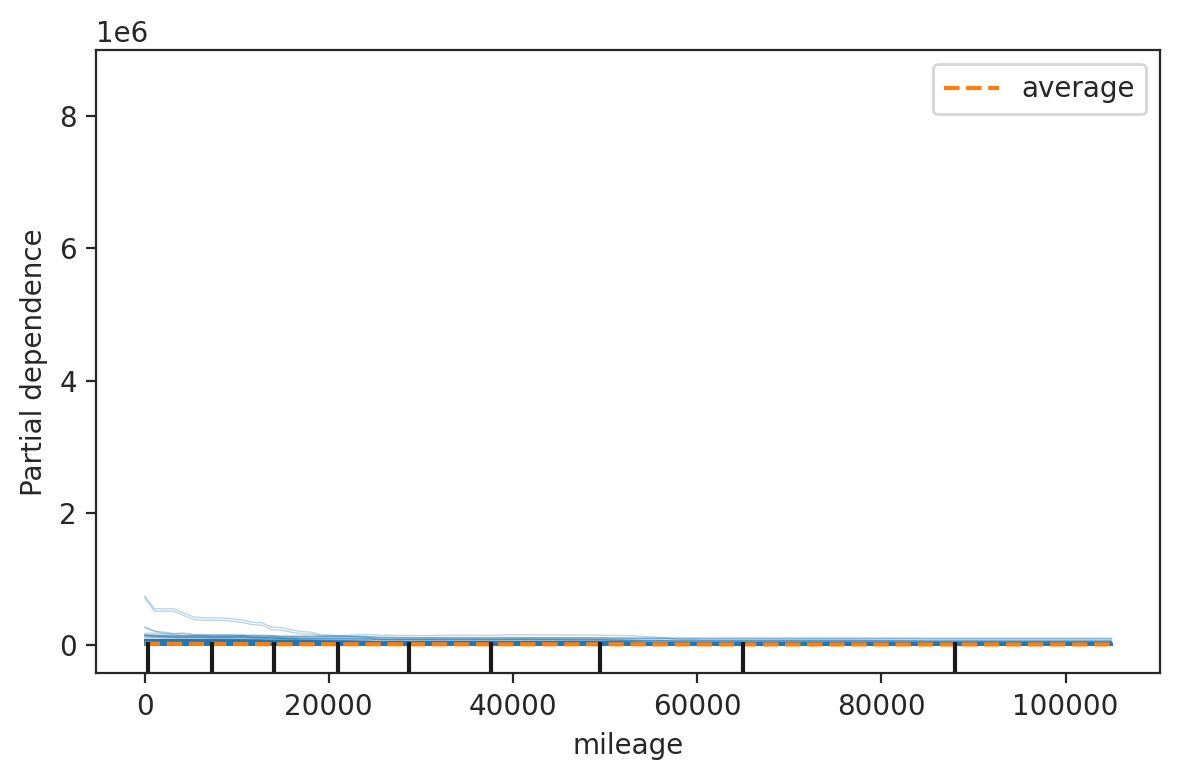

In [82]:
PartialDependenceDisplay.from_estimator(
    rfr, X_test, features=['mileage'], kind='both'
);
plt.tight_layout()
plt.savefig('PDP_mileage.png',dpi=300,bbox_inches='tight')
plt.show(block=False)

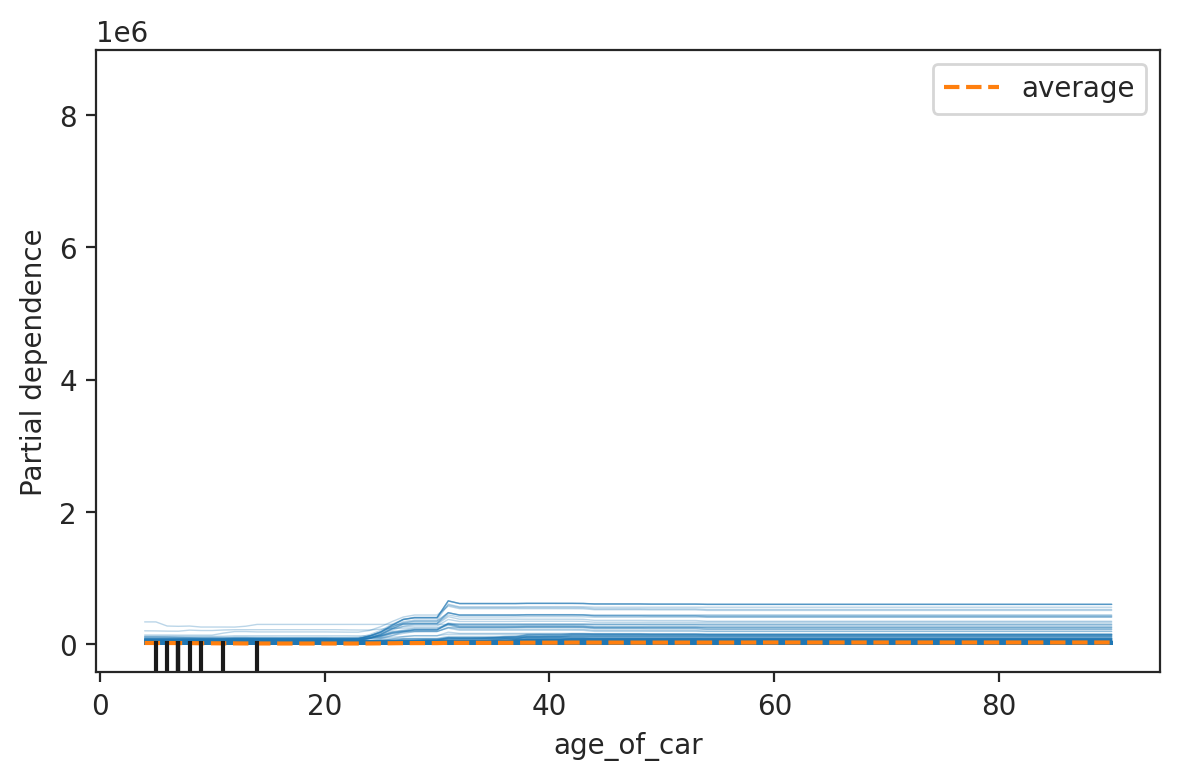

In [83]:
PartialDependenceDisplay.from_estimator(
    rfr, X_test, features=['age_of_car'], kind='both'
);
plt.tight_layout()
plt.savefig('PDP_aoc.png',dpi=300,bbox_inches='tight')
plt.show(block=False)